### import library yang akan di gunakan

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay

Menampilkan data pada dataset yang digunakan

In [17]:
df = pd.read_csv('dataset-of-00s.csv')
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1
5868,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7,1
5869,"Mass in B minor BWV 232, Missa: Duetto - Chris...",Johann Sebastian Bach,spotify:track:4NIOi1ImMfdufRTsgoKjbD,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11,0
5870,Loog,The Clean,spotify:track:2Qyj2nUdm8y37TCCzDasFn,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11,0


### Supervised learning

Membuat variabel yang dimana isinya pada variabel x adalah Fitur dan y adalah target dari datasetnya

In [18]:
X = df[['danceability', 'energy']] # Feature
y = df['target'] # Target

**Proses Data Split**

Memisahkan dataset menjadi 2 (data latihan dan data uji)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Proses Standarisasi pada kolom train dan test**

Kita lakukan Scalling agar model yang kita latih mudah untuk di proses

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Proses Melatih Model**

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

**Proses Memprediksi Model**

memprediksi hasil dari pelatihan model terhadap x_test

In [22]:
y_pred = reg.predict(X_test)

**Evaluasi Regresi**

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt
import numpy as np

print ("mae =", mean_absolute_error(y_test, y_pred))
print ("mse =", mean_squared_error(y_test, y_pred))
print ("rmse =", np.sqrt(mean_squared_error(y_test, y_pred)))
print ("R-Squared =", r2_score(y_test, y_pred))

mae = 0.3981016781810003
mse = 0.19788792531339985
rmse = 0.44484595683607137
R-Squared = 0.20844313875599685


- Mae adalah rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai 0.3981 menunjukkan bahwa rata-rata kesalahan prediksi adalah sekitar 0.3981 unit.
- Mse adalah rata-rata dari kuadrat kesalahan prediksi. Nilai 0.1979 menunjukkan rata-rata kuadrat kesalahan prediksi.
- Rmse adalah akar kuadrat dari Mean Squared Error. Nilai 0.4448 adalah akar kuadrat rata-rata kuadrat kesalahan prediksi, dan memberikan gambaran tentang sejauh mana prediksi berkisar dari nilai sebenarnya.
- R-Squared mengukur sejauh mana variasi dalam data dapat dijelaskan oleh model. Nilai 0.2084 menunjukkan bahwa model hanya menjelaskan sekitar 20.84% dari variasi dalam data, yang berarti model tersebut tidak sangat cocok dengan data.

Membuat variabel banding yang berisi perbandingan antara data asli dan data yang sudah di prediksi

In [24]:
banding = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

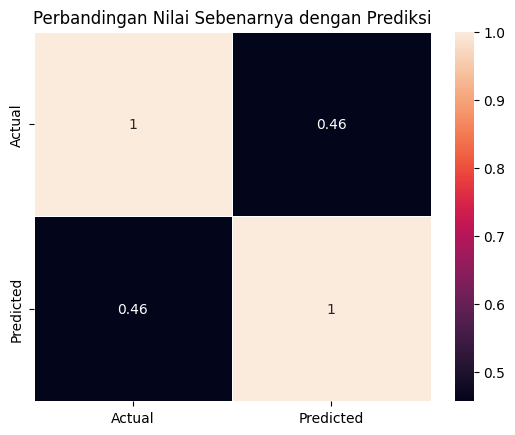

In [25]:
sns.heatmap(banding.corr(), annot=True, linewidths=0.5)
plt.title("Perbandingan Nilai Sebenarnya dengan Prediksi")
plt.show()

berdasarkan visualisasi diatas, ketepatan prediksi model ini sebanyak 0.46 yang dimana artinya model ini termasuk underfitting

### Unsupervised Learning

C:\Users\meisy\AppData\Local\Temp\ipykernel_6652\2622028966.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x="danceability", y="energy",


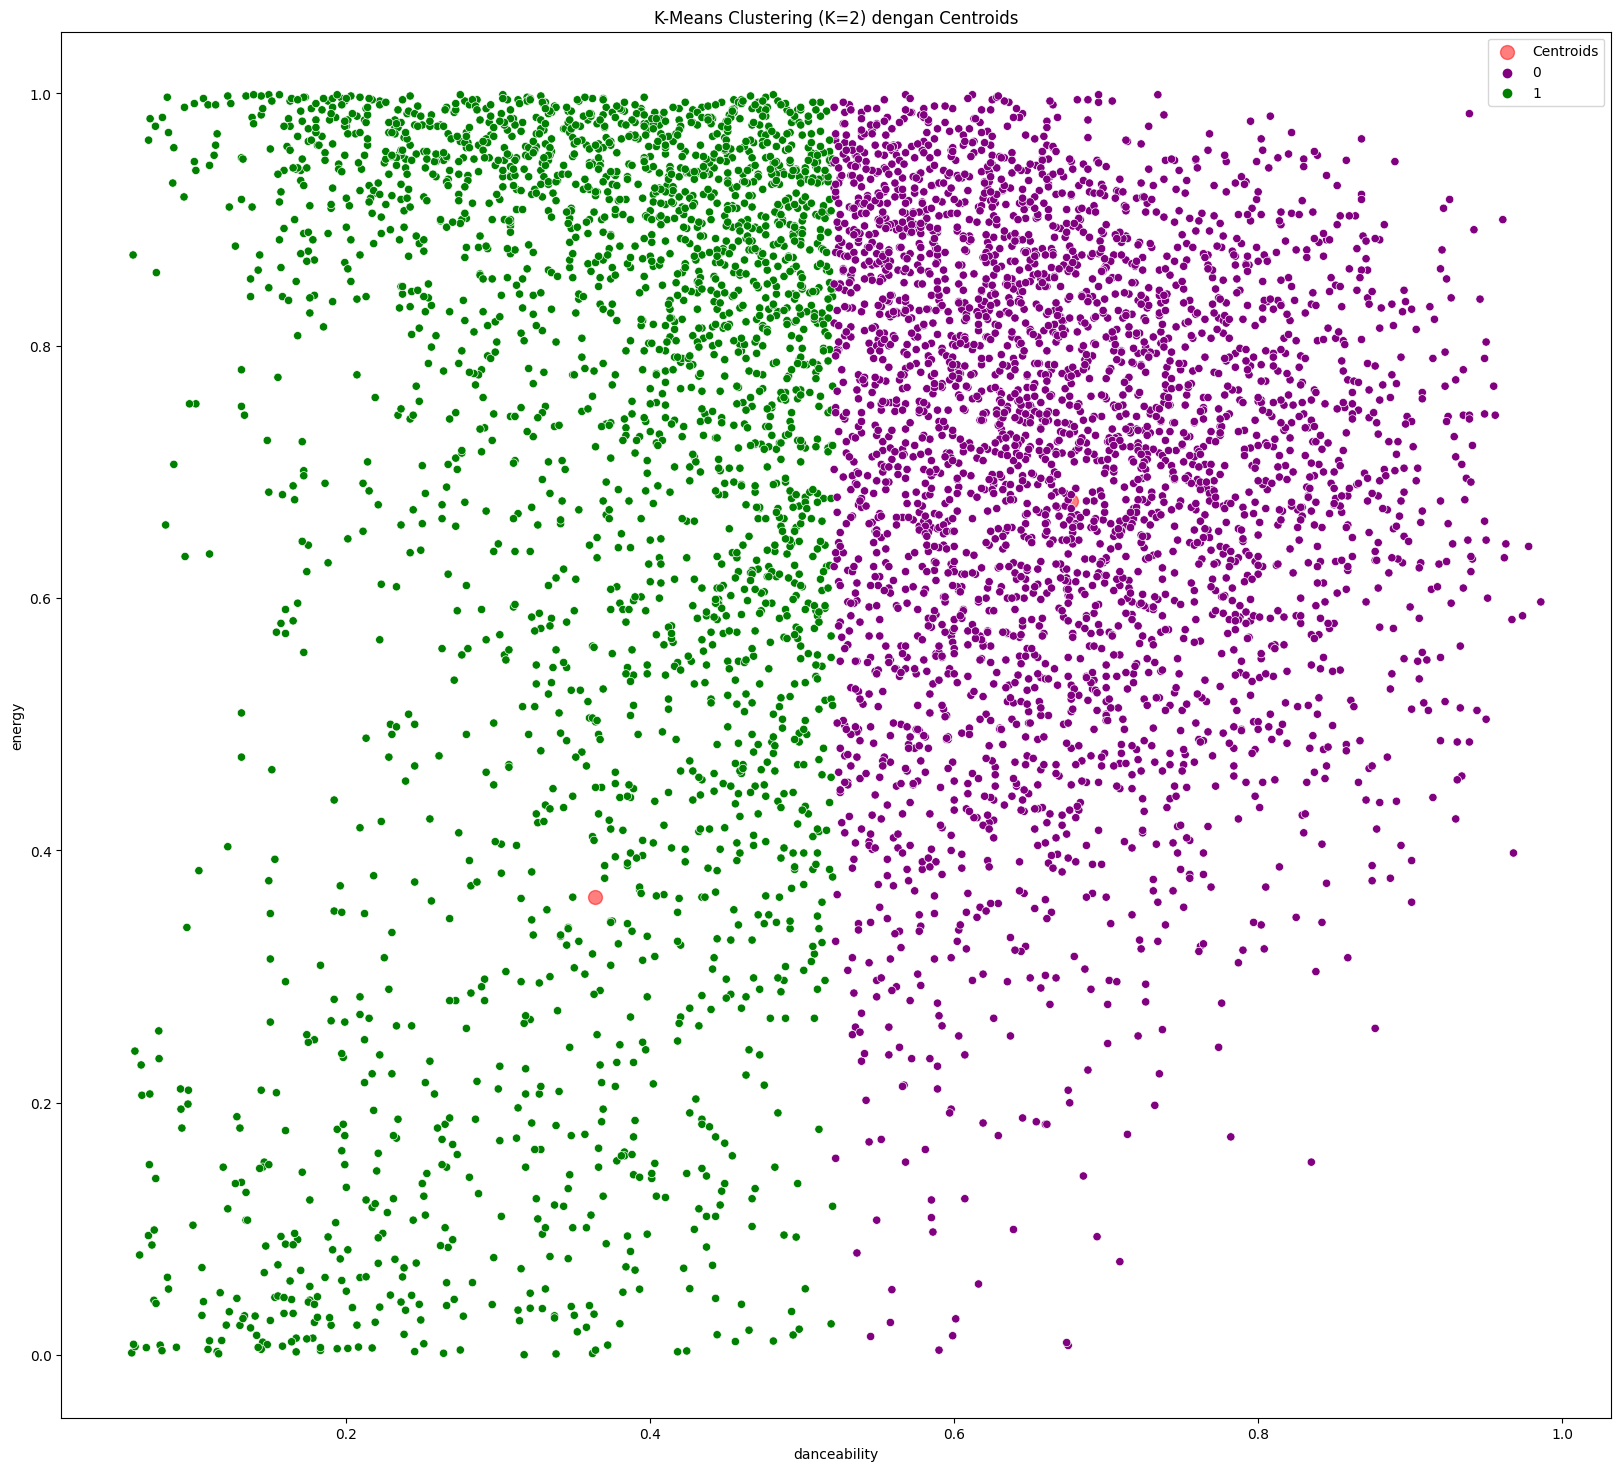

In [26]:
X = df[['danceability', 'energy']].iloc[:, :-1].values 
K = 2 
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
df["cluster"] = cluster_labels 
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20,18))
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 0], alpha=0.5, c='red', s=100,

label='Centroids')

sns.scatterplot(data=df, x="danceability", y="energy",

hue="cluster", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("danceability")
plt.ylabel("energy")
plt.legend()
plt.show()

Evaluasi Model

Tanpa Label

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.57
Davies-Bouldin Index: 0.59
Calinski-Harabasz Index: 11791.38


dari hasil diatas kita dapat simpulkan bahwa:
- nilai silhouette adalah 0.57 yang berarti cluster terpisah dengan baik dan objek di dalam cluster yang sama saling mendekat
- Nilai 0.59 pada Davies-Bouldin menunjukkan bahwa cluster-cluster tersebut cukup terpisah dan memiliki sejumlah kecil tumpang tindih.
- Calinski-Harabasz Index mengukur seberapa baik cluster-cluster tersebut terdefinisi dengan baik dan terpisah satu sama lain. Nilai yang tinggi seperti 11791.38 menunjukkan bahwa cluster-cluster tersebut memiliki tingkat pemisahan yang sangat baik.

Dengan Label Asli

In [28]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score 
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

cross_tab = pd.crosstab(df["cluster"], df["target"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(df["target"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

true_labels_num = df["target"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

homogeneity = homogeneity_score(df["target"], cluster_labels)
completeness = completeness_score(df["target"], cluster_labels)
v_measure = v_measure_score(df["target"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
target      0     1
cluster            
0        1117  2235
1        1819   701 

Adjusted Rand Index (ARI): 0.14
Normalized Mutual Information (NMI): 0.11
Homogeneity Score: 0.11
Completeness Score: 0.11
V-Measure Score: 0.11


Dari hasil diatas dapat di lihat bahwa:
- Adjusted Rand Index (ARI): 0.14
Nilai ARI 0.14 menunjukkan tingkat kesesuaian yang rendah antara clustering dan label target.

- Normalized Mutual Information (NMI): 0.11
Nilai NMI 0.11 menunjukkan bahwa hubungan antara cluster dan label target relatif rendah.

- Homogeneity Score: 0.11
Nilai homogenitas 0.11 menunjukkan bahwa clustering tidak sangat homogen.

- Completeness Score: 0.11
Nilai kelengkapan 0.11 menunjukkan bahwa clustering tidak sangat lengkap.

- V-Measure Score: 0.11
Nilai V-Measure 0.11 mencerminkan tingkat keseluruhan kualitas clustering yang relatif rendah.

C:\Users\meisy\AppData\Local\Temp\ipykernel_6652\3368104550.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(df, x="danceability", y="energy", palette=warna,
C:\Users\meisy\AppData\Local\Temp\ipykernel_6652\3368104550.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(df, x="danceability", y="energy", palette=warna,


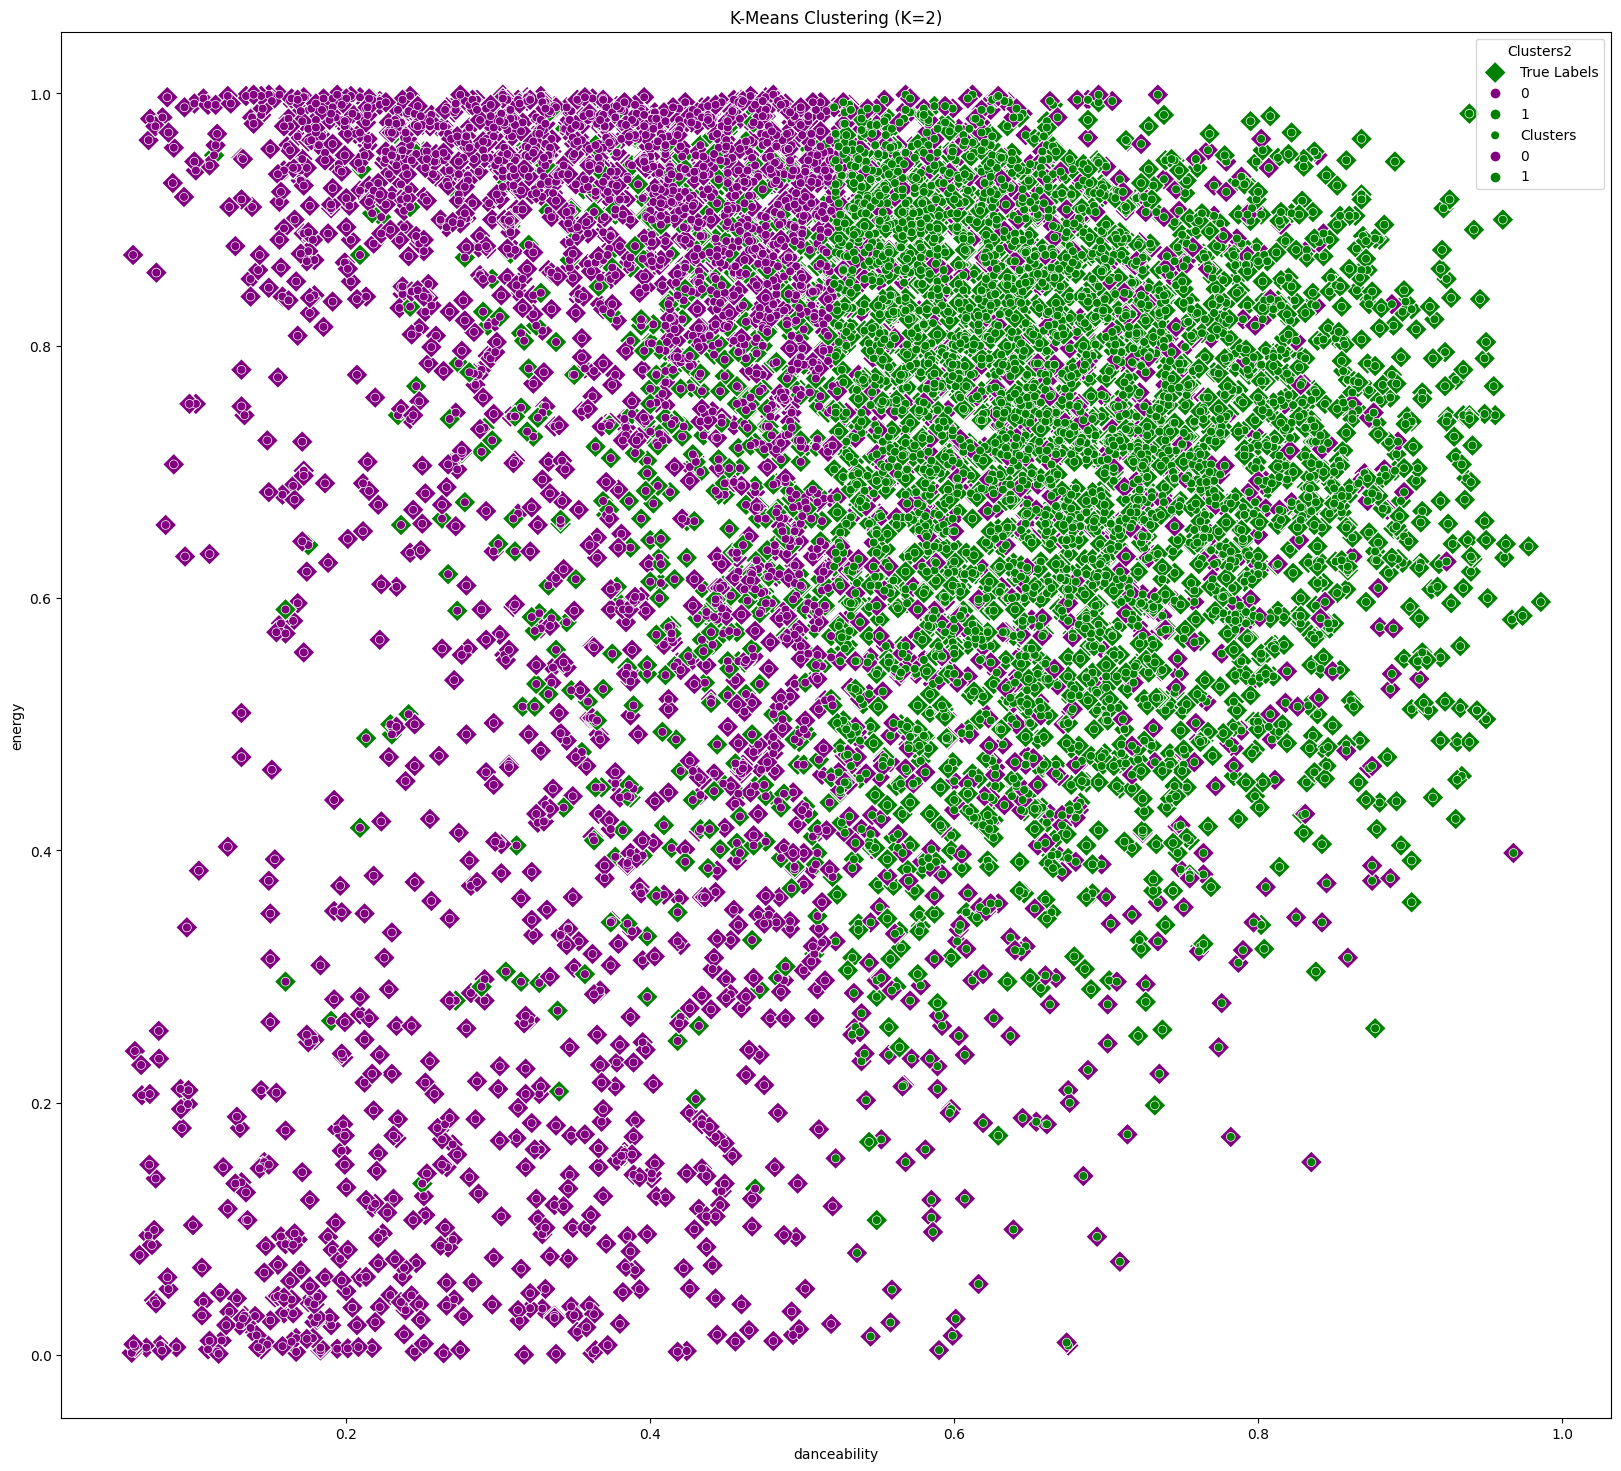

In [29]:
cluster_mapping = {0: 1, 1: 0, 2: 2} 
df["cluster2"] = df["cluster"].map(cluster_mapping)
plt.figure(figsize=(20,18))
warna = ["purple", "green", "black"]
sns.scatterplot(df, x="danceability", y="energy", palette=warna,
hue="target", marker="D", s=130, label="True Labels")

sns.scatterplot(df, x="danceability", y="energy", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel("danceability")
plt.ylabel("energy")
plt.legend(title="Clusters2", loc="upper right")
plt.show()

Pada label 1, model berhasil tepat sasaran (Benar 50, salah 0)